In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
%pip install -q seaborn
import seaborn as sns # statistical data visualization

#-- plotly
%pip install -q chart-studio
import micropip
await micropip.install("ssl")
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
#--

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [4]:
data = pd.read_csv('./data/cm1.csv')

### About this Software Defect Prediction Dataset

This is a Promise data set made publicly available in order to encourage repeatable, verifiable, refutable, and/or improvable predictive models of software engineering.

### *Attribute Information:*

1. loc : numeric % McCabe's line count of code
2. v(g) : numeric % McCabe "cyclomatic complexity"
3. ev(g) : numeric % McCabe "essential complexity"
4. iv(g) : numeric % McCabe "design complexity"
5. n : numeric % Halstead total operators + operands
6. v : numeric % Halstead "volume"
7. l : numeric % Halstead "program length"
8. d : numeric % Halstead "difficulty"
9. i : numeric % Halstead "intelligence"
10. e : numeric % Halstead "effort"
11. b : numeric % Halstead
12. t : numeric % Halstead's time estimator
13. lOCode : numeric % Halstead's line count
14. lOComment : numeric % Halstead's count of lines of comments
15. lOBlank : numeric % Halstead's count of blank lines
16. lOCodeAndComment : numeric
17. uniq_Op : numeric % unique operators
18. uniq_Opnd : numeric % unique operands
19. total_Op : numeric % total operators
20. total_Opnd : numeric % total operands
21. branchCount : numeric % of the flow graph
22. defects : {false,true} % module has/has not one or more reported defects

### Data Discovery & Visualization

In [5]:
data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                498 non-null    float64
 1   v(g)               498 non-null    float64
 2   ev(g)              498 non-null    float64
 3   iv(g)              498 non-null    float64
 4   n                  498 non-null    float64
 5   v                  498 non-null    float64
 6   l                  498 non-null    float64
 7   d                  498 non-null    float64
 8   i                  498 non-null    float64
 9   e                  498 non-null    float64
 10  b                  498 non-null    float64
 11  t                  498 non-null    float64
 12  lOCode             498 non-null    int64  
 13  lOComment          498 non-null    int64  
 14  lOBlank            498 non-null    int64  
 15  locCodeAndComment  498 non-null    int64  
 16  uniq_Op            498 non

In [6]:
data.head() #shows first 5 rows

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15.0,15.0,44.0,19.0,9.0,False
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16.0,8.0,31.0,16.0,7.0,False
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False


In [7]:
data.tail() #shows last 5 rows

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,2,13,2,0,23.0,46.0,144.0,112.0,5.0,True
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,1,7,4,0,22.0,23.0,67.0,40.0,7.0,True
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,9,59,35,0,32.0,68.0,285.0,190.0,21.0,True
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,1,12,4,0,13.0,13.0,19.0,13.0,3.0,True
497,28.0,6.0,5.0,5.0,104.0,564.33,0.06,16.09,35.08,9078.38,...,2,7,0,0,20.0,23.0,67.0,37.0,11.0,True


In [8]:
data.sample(10) #shows random rows (sample(number_of_rows))

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
132,12.0,1.0,1.0,1.0,21.0,75.28,0.50,2.00,37.64,150.57,...,0,0,0,0,4.0,8.0,13.0,8.0,1.0,False
118,154.0,17.0,10.0,13.0,695.0,5143.61,0.03,38.57,133.35,198396.43,...,20,119,26,0,36.0,133.0,410.0,285.0,28.0,False
64,6.0,1.0,1.0,1.0,16.0,57.36,0.29,3.50,16.39,200.76,...,0,4,0,0,7.0,5.0,11.0,5.0,1.0,False
398,2.0,1.0,1.0,1.0,1.0,0.00,0.00,0.00,0.00,0.00,...,0,0,1,0,1.0,0.0,1.0,0.0,1.0,False
152,55.0,9.0,1.0,3.0,292.0,1738.63,0.03,33.32,52.18,57931.89,...,12,20,10,0,23.0,39.0,179.0,113.0,17.0,False
380,13.0,3.0,1.0,2.0,66.0,313.82,0.07,13.93,22.53,4371.10,...,4,19,13,0,13.0,14.0,36.0,30.0,5.0,False
5,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16.0,12.0,46.0,26.0,11.0,False
413,11.0,2.0,1.0,1.0,32.0,142.70,0.10,9.63,14.83,1373.50,...,1,2,3,0,14.0,8.0,21.0,11.0,3.0,False
415,23.0,4.0,4.0,4.0,96.0,492.41,0.10,10.50,46.90,5170.32,...,1,5,7,0,15.0,20.0,68.0,28.0,7.0,False
456,44.0,7.0,1.0,7.0,269.0,1746.31,0.05,22.12,78.96,38620.28,...,6,14,36,0,25.0,65.0,154.0,115.0,13.0,True


In [9]:
data.shape #shows the number of rows and columns

(498, 22)

In [10]:
data.describe() #shows simple statistics (min, max, mean, etc.)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,4.980000e+02,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,29.644779,5.382329,2.490763,3.528916,143.956426,900.175823,0.146325,15.829378,38.455361,3.488493e+04,...,1938.056124,3.787149,12.283133,11.534137,0.006024,15.199197,25.452209,88.389960,55.570683,9.348193
std,42.753572,8.347359,3.658847,5.464398,221.049888,1690.814334,0.159337,15.330960,36.996297,1.341647e+05,...,7453.591519,8.508658,25.828605,19.981476,0.100120,9.617815,33.925816,134.917513,86.969527,15.072219
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,8.000000,1.000000,1.000000,1.000000,25.000000,102.190000,0.050000,5.630000,16.210000,6.061700e+02,...,33.672500,0.000000,0.000000,1.000000,0.000000,9.000000,7.000000,15.000000,10.000000,1.000000
50%,17.000000,3.000000,1.000000,2.000000,67.500000,329.820000,0.090000,11.640000,27.400000,3.677620e+03,...,204.310000,1.000000,4.000000,5.000000,0.000000,14.000000,15.000000,42.000000,26.000000,5.000000
75%,31.000000,6.000000,1.000000,4.000000,151.750000,861.460000,0.177500,21.142500,46.900000,1.663334e+04,...,924.075000,4.000000,14.000000,13.000000,0.000000,20.000000,30.000000,94.750000,59.750000,11.000000
max,423.000000,96.000000,30.000000,63.000000,2075.000000,17124.280000,1.300000,125.770000,293.680000,2.153691e+06,...,119649.480000,80.000000,339.000000,164.000000,2.000000,72.000000,314.000000,1261.000000,814.000000,162.000000


In [11]:
defects_true_false = data.groupby('defects')['b'].apply(lambda x: x.count()) #defect rates (true/false)
print('False : ' , defects_true_false[0])
print('True : ' , defects_true_false[1])

False :  449
True :  49


### -> Histogram

In [ ]:
%pip install --upgrade nbformat
#%pip install micropip
#micropip.install(..., keep_going=True)
trace = go.Histogram(
    x = data.defects,
    opacity = 0.75,
    name = "Defects",
    marker = dict(color = 'green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Defects',
                   xaxis = dict(title = 'True - False'),
                   yaxis = dict(title = 'Frequency'),
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

### -> Covariance

Covariance is a measure of the directional relationship between the returns on two risky assets. A positive covariance means that asset returns move together while a negative covariance means returns move inversely.

In [12]:
data.corr() #shows coveriance matrix

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.942908,0.773607,0.919270,0.940466,0.952699,-0.357998,0.728502,0.797565,0.814611,...,0.679721,0.862704,0.679942,-0.040300,0.803036,0.943241,0.941778,0.929347,0.940823,0.246467
v(g),0.942908,1.000000,0.806544,0.929741,0.907581,0.919714,-0.342571,0.773446,0.668793,0.856458,...,0.733292,0.795747,0.666712,-0.029726,0.801255,0.860150,0.910242,0.894691,0.991826,0.166761
ev(g),0.773607,0.806544,1.000000,0.714994,0.770008,0.773645,-0.280011,0.675765,0.554699,0.685490,...,0.605862,0.682972,0.568783,-0.020170,0.649567,0.710749,0.775750,0.753672,0.829226,0.105047
iv(g),0.919270,0.929741,0.714994,1.000000,0.870063,0.889894,-0.300078,0.679901,0.696397,0.826191,...,0.674501,0.739883,0.647548,-0.024960,0.755188,0.857157,0.873645,0.856111,0.911202,0.202645
n,0.940466,0.907581,0.770008,0.870063,1.000000,0.993306,-0.397294,0.841433,0.810141,0.844168,...,0.727183,0.794619,0.731518,-0.038936,0.837047,0.947383,0.997563,0.994124,0.912958,0.214049
v,0.952699,0.919714,0.773645,0.889894,0.993306,1.000000,-0.346625,0.797672,0.792191,0.876855,...,0.731986,0.813944,0.721394,-0.032055,0.808148,0.948709,0.990824,0.987568,0.920633,0.206623
l,-0.357998,-0.342571,-0.280011,-0.300078,-0.397294,-0.346625,1.000000,-0.540916,-0.404108,-0.196933,...,-0.266412,-0.289062,-0.331775,0.398689,-0.629990,-0.402986,-0.397856,-0.392290,-0.358672,-0.132567
d,0.728502,0.773446,0.675765,0.679901,0.841433,0.797672,-0.540916,1.000000,0.514898,0.717773,...,0.614364,0.614590,0.642382,-0.057531,0.884115,0.697731,0.840947,0.834040,0.773032,0.168173
i,0.797565,0.668793,0.554699,0.696397,0.810141,0.792191,-0.404108,0.514898,1.000000,0.468739,...,0.511707,0.645486,0.580700,-0.060712,0.649853,0.914101,0.809787,0.802842,0.699037,0.267764
e,0.814611,0.856458,0.685490,0.826191,0.844168,0.876855,-0.196933,0.717773,0.468739,1.000000,...,0.664990,0.683293,0.591581,-0.015676,0.656657,0.715288,0.842162,0.839142,0.825467,0.097784


### -> Heatmap

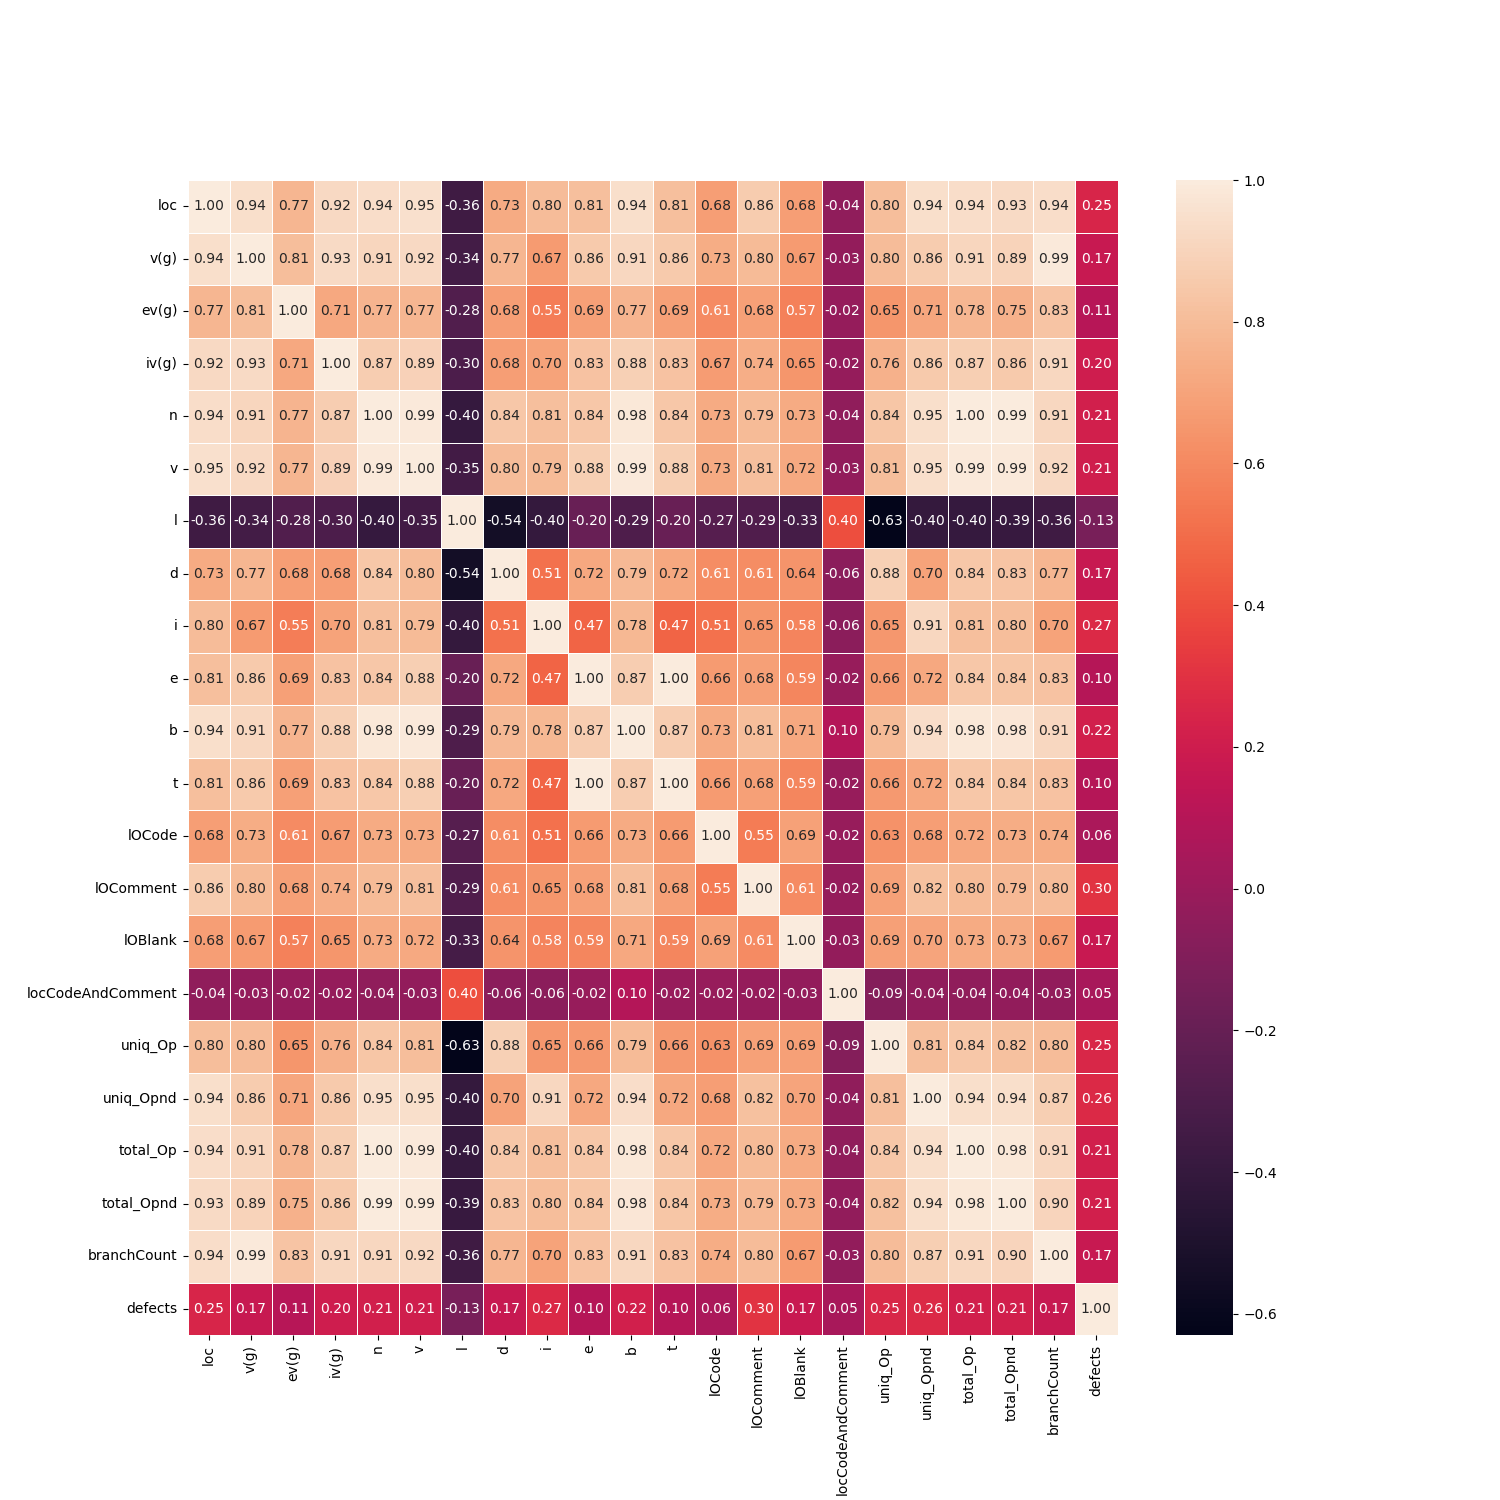

In [13]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

The light color in the heat map indicates that the covariance is high. (Ex. "v-b" , "v-n", etc.)

The dark color in the heat map indicates that the covariance is low. (Ex. "loc-l" , "l-d", etc.)

### -> Scatter Plot

In [ ]:
trace = go.Scatter(
    x = data.v,
    y = data.b,
    mode = "markers",
    name = "Volume - Bug",
    marker = dict(color = 'darkblue'),
    text = "Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title = 'Volume - Bug',
              xaxis = dict(title = 'Volume', ticklen = 5),
              yaxis = dict(title = 'Bug' , ticklen = 5),
             )
fig = dict(data = scatter_data, layout = scatter_layout)
iplot(fig)

#two attributes with high correlation v-b > just about 1

### -> Data Preprocessing

In [14]:
data.isnull().sum() #shows how many of the null

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

No missing value.

No data cleaning needed because the data is all important.

### -> Outlier Detection (Box Plot)

In [ ]:
trace1 = go.Box(
    x = data.uniq_Op,
    name = 'Unique Operators',
    marker = dict(color = 'blue')
    )
box_data = [trace1]
iplot(box_data)

Showing all information when clicking on plot (min, max, q1, q2, etc.).

### -> Feature Extraction

In [15]:
def evaluation_control(data):    
    evaluation = (data.n < 300) & (data.v < 1000 ) & (data.d < 50) & (data.e < 500000) & (data.t < 5000)
    data['complexityEvaluation'] = pd.DataFrame(evaluation)
    data['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in data.complexityEvaluation]

In [16]:
evaluation_control(data)
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,1.2,1.2,1.2,1.2,1.4,False,Succesful
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1.0,1.0,1.0,1.0,1.0,True,Succesful
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,0,6,0,15.0,15.0,44.0,19.0,9.0,False,Succesful
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,3,0,16.0,8.0,31.0,16.0,7.0,False,Succesful
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,3,0,16.0,12.0,46.0,26.0,11.0,False,Succesful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,13,2,0,23.0,46.0,144.0,112.0,5.0,True,Redesign
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,7,4,0,22.0,23.0,67.0,40.0,7.0,True,Succesful
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,59,35,0,32.0,68.0,285.0,190.0,21.0,True,Redesign
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,12,4,0,13.0,13.0,19.0,13.0,3.0,True,Succesful


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   498 non-null    float64
 1   v(g)                  498 non-null    float64
 2   ev(g)                 498 non-null    float64
 3   iv(g)                 498 non-null    float64
 4   n                     498 non-null    float64
 5   v                     498 non-null    float64
 6   l                     498 non-null    float64
 7   d                     498 non-null    float64
 8   i                     498 non-null    float64
 9   e                     498 non-null    float64
 10  b                     498 non-null    float64
 11  t                     498 non-null    float64
 12  lOCode                498 non-null    int64  
 13  lOComment             498 non-null    int64  
 14  lOBlank               498 non-null    int64  
 15  locCodeAndComment     4

In [18]:
data.groupby("complexityEvaluation").size() #complexityEvalution rates (Succesfull/redisgn)

complexityEvaluation
Redesign     112
Succesful    386
dtype: int64

In [ ]:
# Histogram
trace = go.Histogram(
    x = data.complexityEvaluation,
    opacity = 0.75,
    name = 'Complexity Evaluation',
    marker = dict(color = 'darkorange')
)
hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title = 'Complexity Evaluation',
                   xaxis = dict(title = 'Succesful - Redesign'),
                   yaxis = dict(title = 'Frequency')
)
fig = go.Figure(data = hist_data, layout = hist_layout)
iplot(fig)

### -> Data Normalization (Min-Max Normalization)

In [19]:
from sklearn import preprocessing

scale_v = data[['v']]
scale_b = data[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

data['v_ScaledUp'] = pd.DataFrame(v_scaled)
data['b_ScaledUp'] = pd.DataFrame(b_scaled)

data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,1.2,1.2,1.2,1.2,1.4,False,Succesful,0.000076,0.227671
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1.0,1.0,1.0,1.0,1.0,True,Succesful,0.000058,0.175131
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,...,0,15.0,15.0,44.0,19.0,9.0,False,Succesful,0.018052,0.017513
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,...,0,16.0,8.0,31.0,16.0,7.0,False,Succesful,0.012584,0.012259
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,...,0,16.0,12.0,46.0,26.0,11.0,False,Succesful,0.020213,0.021016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,47.0,3.0,1.0,3.0,256.0,1563.78,0.04,28.00,55.85,43785.90,...,0,23.0,46.0,144.0,112.0,5.0,True,Redesign,0.091319,0.091068
494,24.0,4.0,3.0,3.0,107.0,587.63,0.05,19.13,30.72,11241.58,...,0,22.0,23.0,67.0,40.0,7.0,True,Succesful,0.034316,0.035026
495,82.0,11.0,3.0,10.0,475.0,3155.83,0.02,44.71,70.59,141084.24,...,0,32.0,68.0,285.0,190.0,21.0,True,Redesign,0.184290,0.183888
496,10.0,2.0,1.0,1.0,32.0,150.41,0.15,6.50,23.14,977.69,...,0,13.0,13.0,19.0,13.0,3.0,True,Succesful,0.008783,0.008757


In [20]:
scaled_data = pd.concat([data.v , data.b , data.v_ScaledUp , data.b_ScaledUp], axis=1)
scaled_data

,v,b,v_ScaledUp,b_ScaledUp
0,1.30,1.30,0.000076,0.227671
1,1.00,1.00,0.000058,0.175131
2,309.13,0.10,0.018052,0.017513
3,215.49,0.07,0.012584,0.012259
4,346.13,0.12,0.020213,0.021016
...,...,...,...,...
493,1563.78,0.52,0.091319,0.091068
494,587.63,0.20,0.034316,0.035026
495,3155.83,1.05,0.184290,0.183888
496,150.41,0.05,0.008783,0.008757


### -> Model Selection

### 1. Naive Bayes

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   498 non-null    float64
 1   v(g)                  498 non-null    float64
 2   ev(g)                 498 non-null    float64
 3   iv(g)                 498 non-null    float64
 4   n                     498 non-null    float64
 5   v                     498 non-null    float64
 6   l                     498 non-null    float64
 7   d                     498 non-null    float64
 8   i                     498 non-null    float64
 9   e                     498 non-null    float64
 10  b                     498 non-null    float64
 11  t                     498 non-null    float64
 12  lOCode                498 non-null    int64  
 13  lOComment             498 non-null    int64  
 14  lOBlank               498 non-null    int64  
 15  locCodeAndComment     4

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

X = data.iloc[:, :-10].values  #Select related attribute values for selection
Y = data.complexityEvaluation.values   #Select classification attribute values

In [23]:
Y

array(['Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Redesign',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Redesign',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Redesign', 'Redesign',
       'Succesful', 'Redesign', 'Redesign', 'Redesign', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Redesign', 'Redesign',
       'Redesign', 'Succesful', 'Succesful', 'Succesful', 'Redesign',
       'Redesign', 'Succesful', 'Redesign', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Redesign',
       'Succesful', 'Succesful', 'Succesful', 'Succesful', 'Succesful',
       'Succesful', 'Succesful', 'Redesign', 'Succesful', 'Succesful',
       

In [24]:
#Parsing selection and verification datasets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [25]:
#Creation of Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [26]:
#Calculation of ACC value by K-fold cross validation of NB model
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits = 10, random_state = seed, shuffle = True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)

In [27]:
cv_results

array([0.95      , 1.        , 0.975     , 1.        , 1.        ,
       0.95      , 0.95      , 0.9       , 0.94871795, 0.97435897])

In [28]:
msg = "Mean : %f - Std : (%f)" % (cv_results.mean(), cv_results.std())
msg

'Mean : 0.964808 - Std : (0.030046)'

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

    Redesign       1.00      1.00      1.00        21
   Succesful       1.00      1.00      1.00        79

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[21  0]
 [ 0 79]]
ACC:  1.0


### 2. Decision Tree

In [30]:
from sklearn import tree

In [31]:
model = tree.DecisionTreeClassifier()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Decision Tree Algorithm
              precision    recall  f1-score   support

    Redesign       1.00      1.00      1.00        21
   Succesful       1.00      1.00      1.00        79

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[21  0]
 [ 0 79]]
ACC:  1.0


### 3. SVM


In [33]:
from sklearn import svm

In [34]:
model = svm.SVC(kernel='linear', C=0.01)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("SVM Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

SVM Algorithm
              precision    recall  f1-score   support

    Redesign       1.00      1.00      1.00        21
   Succesful       1.00      1.00      1.00        79

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[21  0]
 [ 0 79]]
ACC:  1.0



### 4. Random Forest


In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
model=RandomForestClassifier(n_estimators=100)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Random Forest Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Random Forest Algorithm
              precision    recall  f1-score   support

    Redesign       1.00      1.00      1.00        21
   Succesful       1.00      1.00      1.00        79

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[21  0]
 [ 0 79]]
ACC:  1.0


## 5. KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
model = KNeighborsClassifier(n_neighbors=5)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("K-Nearest Neighbors Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

K-Nearest Neighbors Algorithm
              precision    recall  f1-score   support

    Redesign       1.00      0.95      0.98        21
   Succesful       0.99      1.00      0.99        79

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.98       100
weighted avg       0.99      0.99      0.99       100

[[20  1]
 [ 0 79]]
ACC:  0.99


## 6. Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [71]:
model = LogisticRegression(solver='lbfgs', max_iter=10000)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Logistic Regression Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Logistic Regression Algorithm
              precision    recall  f1-score   support

    Redesign       1.00      1.00      1.00        21
   Succesful       1.00      1.00      1.00        79

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[21  0]
 [ 0 79]]
ACC:  1.0
